# Multiple Linear regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Read the dataset

In [3]:
import pandas as pd
df=pd.read_csv("50_Startups (1).csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

### seperating X and Y

In [7]:
x=df[['RND','ADMIN','MKT']]
y=df[['PROFIT']]

In [8]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [9]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


#### creating a linearregression model

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

### check intercept and coefficients

In [11]:
model.intercept_

array([50122.19298987])

In [12]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [13]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [14]:
coef=pd.Series(model.coef_.flatten())
coef.index=x.columns

In [15]:
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'coefficent of lin reg'}>

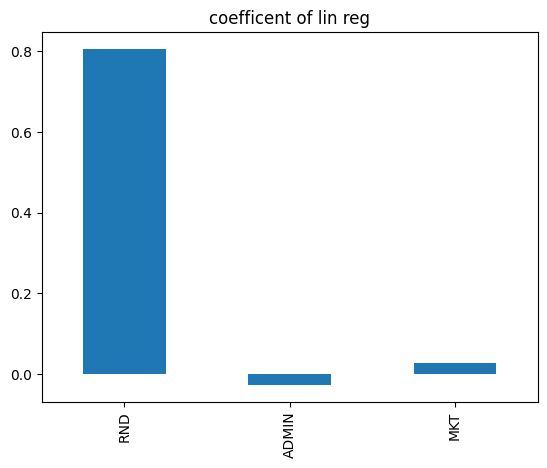

In [16]:
coef.plot(kind='bar',title='coefficent of lin reg')

### Evaluate the model

In [18]:
model.score(x,y)

0.9507459940683246

### predict the result for x

In [19]:
ypred=model.predict(x)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [20]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse=mean_squared_error(y,ypred)
mse

78417126.01913083

In [27]:
rmse=mse**(1/2)
rmse

8855.34448901514

In [29]:
mae=mean_absolute_error(y,ypred)
mae

6471.4503961048085

In [30]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y,ypred)
mape

0.10601209160494125

In [31]:
from sklearn.metrics import r2_score
r2=r2_score(y,ypred)
r2

0.9507459940683246

### Above model is good and can be used out of sample prediction

In [32]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [33]:
xnew=[[100000,30000,50000]]
model.predict(xnew)

array([[131250.62216964]])

## Higher spend in rnd more will the profit for given startup